In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
import glob
import csv
import os
import sys

from datetime import datetime, timedelta
from tsmoothie.smoother import *
from tsmoothie.utils_func import sim_seasonal_data
from tsmoothie.smoother import DecomposeSmoother

In [2]:
#sys.stdout = open('D:\python\error_log.txt','a')

In [3]:
#today = datetime.now()
today = datetime(2020, 11, 30)
last_date=today-timedelta(weeks=1)
today = today.strftime('%Y-%m-%d')#ex)2019-03-14
last_date = last_date.strftime('%Y-%m-%d')#ex)2019-03-14

In [4]:
#import CUBRIDdb
import pymysql

conn = pymysql.connect(
    user='egov39exbd', 
    passwd='579nof83', 
    host='172.17.17.165', 
    db='egov39exbd', 
    charset='utf8'
)
cur = conn.cursor(pymysql.cursors.DictCursor)

selectQry = """\
    SELECT
        cstmr_no,
        mrnr_no,
        smrt_trmnl_no,
        mtinsp_dt,
        smrt_mtinsp_hour_usgqty
    FROM asmartmiteringinfo
    WHERE creat_stle = 'N'
    AND cstmr_no = '1970000026'
    AND mrnr_no = 'A00'
    AND mtinsp_dt BETWEEN '{last_date} 01:00:00' AND '{today} 00:00:00'
    AND SUBSTR(cstmr_no, 0,4) != '2007'
    ORDER BY cstmr_no, smrt_trmnl_no, mtinsp_dt
""".format(last_date=last_date, today=today)

print(selectQry)

cur.execute(selectQry)
rows = cur.fetchall()

df = pd.DataFrame(rows)
df.columns=['cstmr_no', 'mrnr_no', 'smrt_trmnl_no', 'mtinsp_dt', 'smrt_mtinsp_hour_usgqty']

    SELECT
        cstmr_no,
        mrnr_no,
        smrt_trmnl_no,
        mtinsp_dt,
        smrt_mtinsp_hour_usgqty
    FROM asmartmiteringinfo
    WHERE creat_stle = 'N'
    AND cstmr_no = '1970000026'
    AND mrnr_no = 'A00'
    AND mtinsp_dt BETWEEN '2020-11-23 01:00:00' AND '2020-11-30 00:00:00'
    AND SUBSTR(cstmr_no, 0,4) != '2007'
    ORDER BY cstmr_no, smrt_trmnl_no, mtinsp_dt



In [5]:
df

,cstmr_no,mrnr_no,smrt_trmnl_no,mtinsp_dt,smrt_mtinsp_hour_usgqty
0,1970000026,A00,1911WS0059893,2020-11-23 01:00:00,0.000
1,1970000026,A00,1911WS0059893,2020-11-23 02:00:00,0.000
2,1970000026,A00,1911WS0059893,2020-11-23 03:00:00,0.000
3,1970000026,A00,1911WS0059893,2020-11-23 04:00:00,0.000
4,1970000026,A00,1911WS0059893,2020-11-23 05:00:00,0.000
...,...,...,...,...,...
152,1970000026,A00,1911WS0059893,2020-11-29 20:00:00,0.000
153,1970000026,A00,1911WS0059893,2020-11-29 21:00:00,0.000
154,1970000026,A00,1911WS0059893,2020-11-29 22:00:00,0.000
155,1970000026,A00,1911WS0059893,2020-11-29 23:00:00,0.000


In [6]:
#df_du = df.drop_duplicates(["cstmr_no"], keep="last")

In [7]:
smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
df[['smrt_mtinsp_hour_usgqty']] = df[['smrt_mtinsp_hour_usgqty']].apply(pd.to_numeric)
smoother.smooth(df['smrt_mtinsp_hour_usgqty'])
low, up = smoother.get_intervals('prediction_interval')

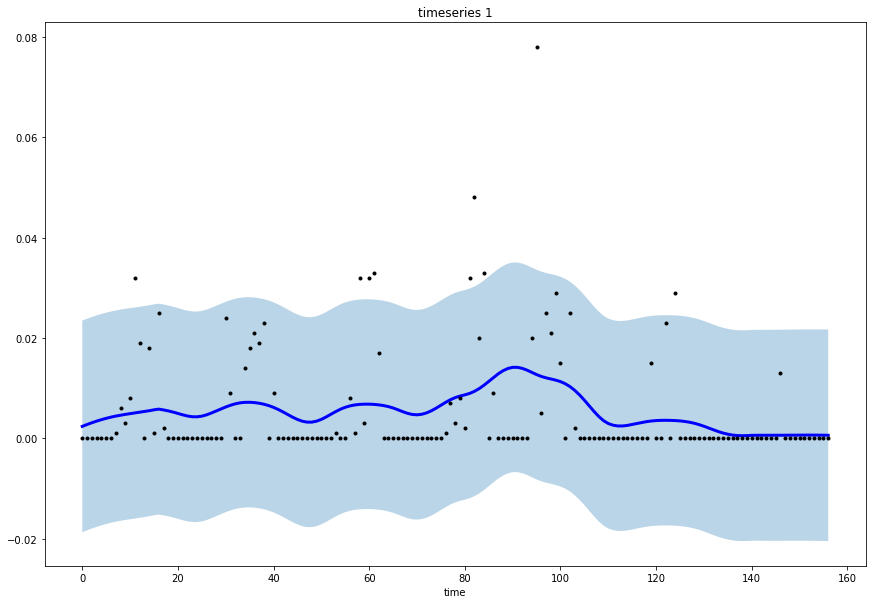

In [9]:
plt.figure(figsize=(50,10))
plt.subplot(1,3,1)
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.title(f"timeseries {1}")
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)